In [2]:
from tensorflow import keras
from tensorflow.keras import layers, metrics, optimizers, activations, losses
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf

In [4]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation=activations.relu)(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation=activations.relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation=activations.relu)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation=activations.softmax)(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

In [6]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype(np.float32) / 255.
test_images = test_images.reshape((10000, 28, 28, 1)).astype(np.float32) / 255.

model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.SparseCategoricalCrossentropy(),
              metrics=[metrics.SparseCategoricalAccuracy()])

model.fit(train_images, train_labels, epochs=5, batch_size=64, verbose=2)

Epoch 1/5


2023-08-10 16:53:53.670221: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


938/938 - 10s - loss: 0.1569 - sparse_categorical_accuracy: 0.9515 - 10s/epoch - 10ms/step
Epoch 2/5
938/938 - 8s - loss: 0.0443 - sparse_categorical_accuracy: 0.9861 - 8s/epoch - 9ms/step
Epoch 3/5
938/938 - 8s - loss: 0.0309 - sparse_categorical_accuracy: 0.9901 - 8s/epoch - 9ms/step
Epoch 4/5
938/938 - 8s - loss: 0.0235 - sparse_categorical_accuracy: 0.9926 - 8s/epoch - 9ms/step
Epoch 5/5
938/938 - 9s - loss: 0.0187 - sparse_categorical_accuracy: 0.9942 - 9s/epoch - 9ms/step


In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 2s 5ms/step - loss: 0.0233 - sparse_categorical_accuracy: 0.9925


0.9925000667572021

In [8]:
# Creating a smaller dataset from the Dogs-vs-Cats Kaggle Dataset

import os, shutil, pathlib

def make_subset(subset_name:str, start_index:int, end_index:int, original_dir:pathlib.Path, new_base_dir:pathlib.Path):
    for category in ('cat', 'dog'):
        dir = new_base_dir / subset_name / category
        if not os.path.exists(dir):
            os.makedirs(dir)
        fnames = [f'{category}.{i}.jpg' for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)

def create_smaller_dataset(original_dir:pathlib.Path, new_base_dir:pathlib.Path):

    make_subset('train', start_index=0, end_index=1000, original_dir=original_dir, new_base_dir=new_base_dir)
    make_subset('validation', start_index=1000, end_index=1500, original_dir=original_dir, new_base_dir=new_base_dir)
    make_subset('test', start_index=1500, end_index=2500, original_dir=original_dir, new_base_dir=new_base_dir)

In [9]:
original_dir = pathlib.Path('../train/train')
new_base_dir = pathlib.Path('data/cats_vs_dogs_small')

create_smaller_dataset(original_dir=original_dir, new_base_dir=new_base_dir)

In [10]:
inputs = keras.Input(shape=(180, 180, 3))

x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation=activations.relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation=activations.relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation=activations.relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation=activations.relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation=activations.relu)(x)
x = layers.Flatten()(x)

outputs = layers.Dense(1, activation=activations.sigmoid)(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [11]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

In [12]:
model.compile(loss=losses.BinaryCrossentropy(),
              optimizer=optimizers.RMSprop(),
              metrics=[metrics.BinaryAccuracy()])

In [13]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(new_base_dir / 'train',
                                             image_size=(180,180),
                                             batch_size=32)

validation_dataset = image_dataset_from_directory(new_base_dir / 'validation',
                                                  image_size=(180,180),
                                                  batch_size=32)

test_dataset = image_dataset_from_directory(new_base_dir / 'test',
                                            image_size=(180,180),
                                            batch_size=32)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


## Understanding Tensorflow Dataset objects

In [14]:
import tensorflow as tf

random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [15]:
def print_four(dataset):
    for i, element in enumerate(dataset):
        print(element.shape)

        if i > 2:
            break

In [16]:
print_four(dataset)

(16,)
(16,)
(16,)
(16,)


In [17]:
batched_dataset = dataset.batch(32)

print_four(batched_dataset)

(32, 16)
(32, 16)
(32, 16)
(32, 16)


In [18]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
print_four(reshaped_dataset)

(4, 4)
(4, 4)
(4, 4)
(4, 4)


## Back to training convnets

In [19]:
for data_batch, labels_batch in train_dataset:
    print(f'data batch shape: {data_batch.shape}')
    print(f'labels batch shape: {labels_batch.shape}')
    break


data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [20]:
callbacks = [keras.callbacks.ModelCheckpoint(filepath='ckpts/convnet_from_scratch.keras',
                                            save_best_only=True,
                                            monitor='val_loss')]

history = model.fit(train_dataset,
                    epochs=30,
                    validation_data=validation_dataset,
                    callbacks=callbacks,
                    verbose=0)

In [21]:
def plot_curves(history):

    accuracy = history.history['binary_accuracy']
    val_accuracy = history.history['val_binary_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(accuracy) + 1)

    plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'ro', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

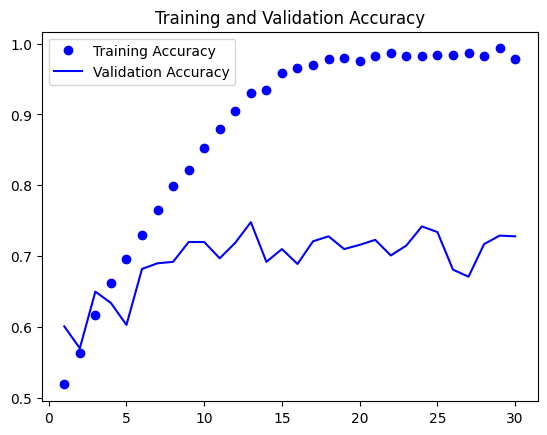

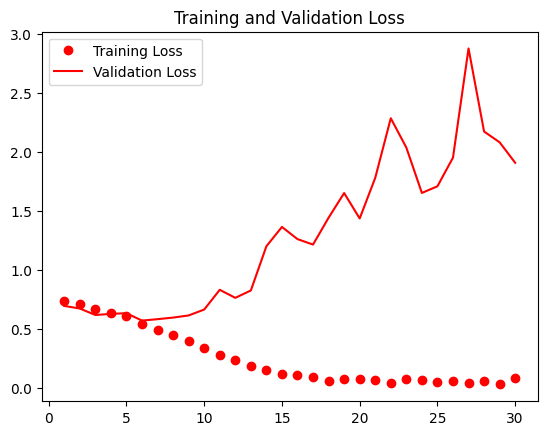

In [22]:
plot_curves(history)

In [23]:
test_model = keras.models.load_model('ckpts/convnet_from_scratch.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)

test_acc

63/63 [==============================] - 1s 20ms/step - loss: 0.5951 - binary_accuracy: 0.6890


0.6890000104904175

## Data Augmentation

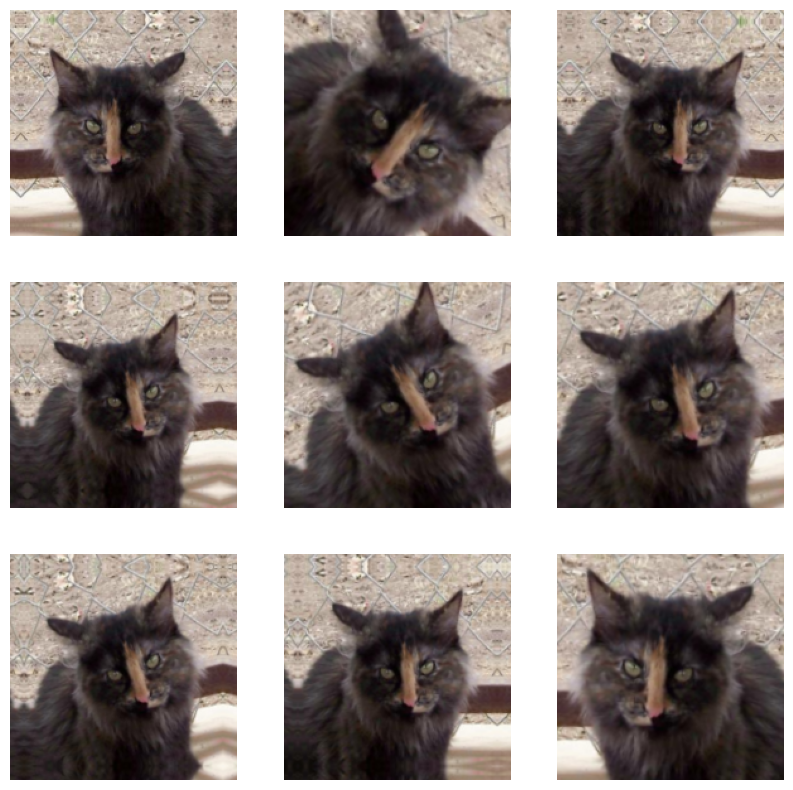

In [24]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip('horizontal'),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2)
    ])
    
plt.figure(figsize=(10,10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype(np.uint8))
        plt.axis('off')

In [25]:
inputs = keras.Input(shape=(180, 180, 3))

x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation=activations.relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation=activations.relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation=activations.relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation=activations.relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation=activations.relu)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation=activations.sigmoid)(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.BinaryCrossentropy(),
              metrics=[metrics.BinaryAccuracy()])

In [26]:
callbacks = [keras.callbacks.ModelCheckpoint(filepath='ckpts/convnet_from_scratch_with_augmentation.keras', 
                                             save_best_only=True,
                                             monitor='val_loss')]

history = model.fit(train_dataset,
                    epochs=100,
                    validation_data=validation_dataset,
                    callbacks=callbacks,
                    verbose=0)

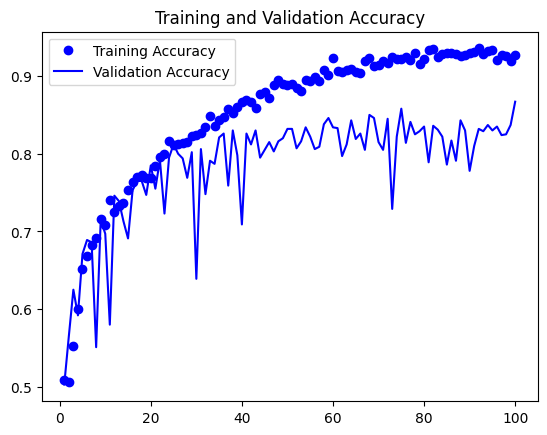

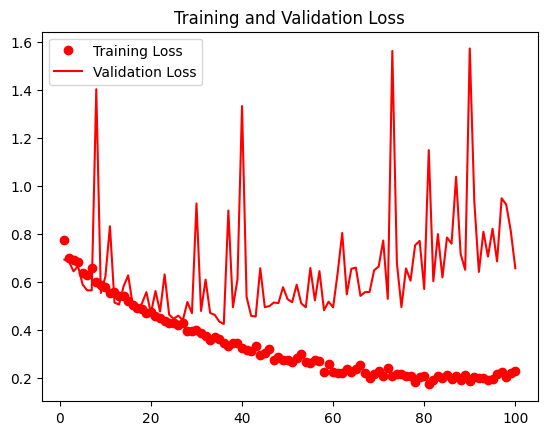

In [27]:
plot_curves(history)

In [28]:
test_model = keras.models.load_model('ckpts/convnet_from_scratch_with_augmentation.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
test_acc

63/63 [==============================] - 1s 21ms/step - loss: 0.4768 - binary_accuracy: 0.8025


0.8025000095367432

## Pretrained

In [29]:
conv_base = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [30]:
# Technique 1: Run the conv_base over our dataset, store outputs into a np array on disk, use this np array as an input to a standalone
#              classifier. It's fast and cheap, but we can't randomly augment data in the network.

def get_features_and_labels(dataset,
                            conv_base=keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))):
    all_features = []
    all_labels = []

    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)

    return np.concatenate(all_features), np.concatenate(all_labels)

In [31]:
train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

train_features.shape

1/1 [==============================] - 0s 13ms/step


(2000, 5, 5, 512)

In [56]:
inputs = keras.Input(shape=(5, 5, 512))

x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation=activations.sigmoid)(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [45]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 5, 5, 512)]       0         
                                                                 
 flatten_5 (Flatten)         (None, 12800)             0         
                                                                 
 dense_7 (Dense)             (None, 256)               3277056   
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 257       
                                                                 
Total params: 3,277,313
Trainable params: 3,277,313
Non-trainable params: 0
_________________________________________________________________


In [46]:
callbacks = [keras.callbacks.ModelCheckpoint(filepath='ckpts/feature_extraction.keras', save_best_only=True, monitor='val_loss')]

model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.BinaryCrossentropy(),
              metrics=[metrics.BinaryAccuracy()])

history = model.fit(train_features,
                    train_labels,
                    epochs=20,
                    validation_data=(val_features, val_labels),
                    callbacks=callbacks,
                    verbose=0)

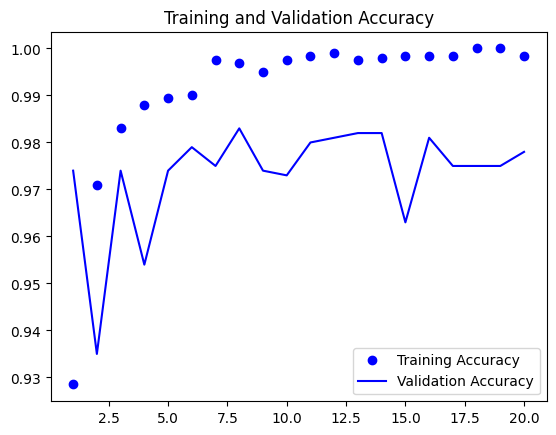

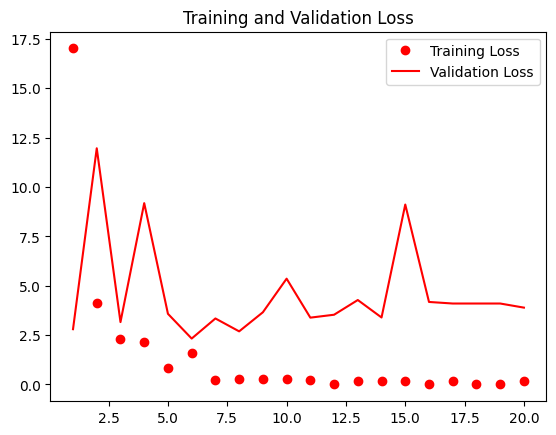

In [47]:
plot_curves(history)

In [49]:
test_model = keras.models.load_model(filepath='ckpts/feature_extraction.keras')
test_loss, test_acc = test_model.evaluate(test_features, test_labels)

test_acc

63/63 [==============================] - 1s 7ms/step - loss: 6.1801 - binary_accuracy: 0.9730


0.9730000495910645

In [61]:
# Technique 2: Chain the conv_base model with a new head (classifier), freeze the conv_base weights, and train the classifier on the whole
#              architecture. This will enable us to regularize using augmentation and dropout.

conv_base = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False)
print(f'Number of trainable weights: {len(conv_base.trainable_weights)}')
conv_base.trainable = False
print(f'Number of trainable weights: {len(conv_base.trainable_weights)}')

Number of trainable weights: 26
Number of trainable weights: 0


In [62]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip('horizontal'),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2)
    ])

inputs = keras.Input(shape=(180, 180, 3))

x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation=activations.sigmoid)(x)

model = keras.Model(inputs, outputs)
model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.BinaryCrossentropy(),
              metrics=[metrics.BinaryAccuracy()])

In [63]:
len(model.trainable_weights) # Two Dense layers: One Weight vector and one bias vector each

4

In [64]:
callbacks = [keras.callbacks.ModelCheckpoint(filepath='ckpts/feature_extraction_with_data_augmentation.keras', 
                                             save_best_only=True, 
                                             monitor='val_loss')]

history = model.fit(train_dataset,
                    epochs=50,
                    validation_data=validation_dataset,
                    callbacks=callbacks,
                    verbose=0)


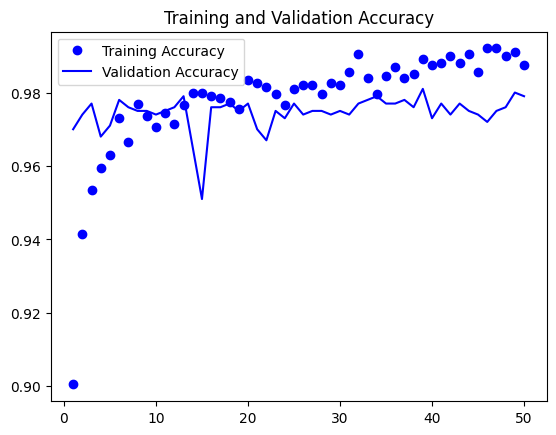

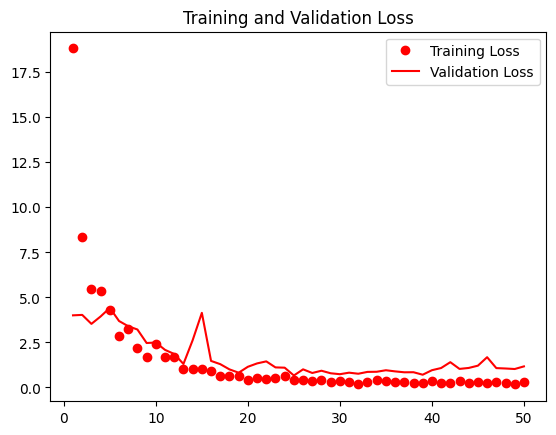

In [65]:
plot_curves(history)

In [66]:
test_model = keras.models.load_model(filepath='ckpts/feature_extraction_with_data_augmentation.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)

test_acc

63/63 [==============================] - 5s 70ms/step - loss: 0.9643 - binary_accuracy: 0.9740


0.9740000367164612

### Fine Tuning the top layer of the Convolutional base

In [50]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [51]:
conv_base.layers

In [67]:
conv_base.trainable = True

for layer in conv_base.layers[:-4]:
    layer.trainable = False 

In [68]:
# model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5),
#               loss=losses.BinaryCrossentropy(),
#               metrics=[metrics.BinaryAccuracy()])

callbacks = [keras.callbacks.ModelCheckpoint(filepath='ckpts/fine_tuning.keras', save_best_only=True, monitor='val_loss')]

history = model.fit(train_dataset, 
                    epochs=30, 
                    validation_data=validation_dataset, 
                    callbacks=callbacks, 
                    verbose=0)

In [69]:
test_model = keras.models.load_model(filepath='ckpts/fine_tuning.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)

test_acc

63/63 [==============================] - 5s 70ms/step - loss: 0.9442 - binary_accuracy: 0.9800


0.9800000190734863